## Data Loading and Preparation

In [3]:
import pandas as pd

# Load the datasets
indian_data = pd.read_csv('IN_Data.xlsx - IN_Mobiles.csv')
japanese_data = pd.read_csv('JPN Data.xlsx - CN_Mobiles.csv')

In [4]:
# Check for missing values
print("Indian Dataset Missing Values:\n", indian_data.isnull().sum())
print("Japanese Dataset Missing Values:\n", japanese_data.isnull().sum())

Indian Dataset Missing Values:
 ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
DT_MAINT      0
dtype: int64
Japanese Dataset Missing Values:
 ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
AGE_CAR       0
PURCHASE      0
dtype: int64


In [5]:
# Check data types first
print(indian_data.dtypes)

# Ensure 'ANN_INCOME' is treated as a string before removing commas
indian_data['ANN_INCOME'] = indian_data['ANN_INCOME'].astype(str).str.replace(',', '').astype(float)
japanese_data['ANN_INCOME'] = japanese_data['ANN_INCOME'].astype(str).str.replace(',', '').astype(float)

# Check for any other non-numeric or unexpected data in the 'ANN_INCOME' column
print(indian_data['ANN_INCOME'].head())
print(japanese_data['ANN_INCOME'].head())


ID            object
CURR_AGE       int64
GENDER        object
ANN_INCOME    object
DT_MAINT      object
dtype: object
0    1425390.0
1    1678954.0
2     931624.0
3    1106320.0
4     748465.0
Name: ANN_INCOME, dtype: float64
0    445344.0
1    107634.0
2    502787.0
3    585664.0
4    705723.0
Name: ANN_INCOME, dtype: float64


## Exploratory Data Analysis (EDA)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

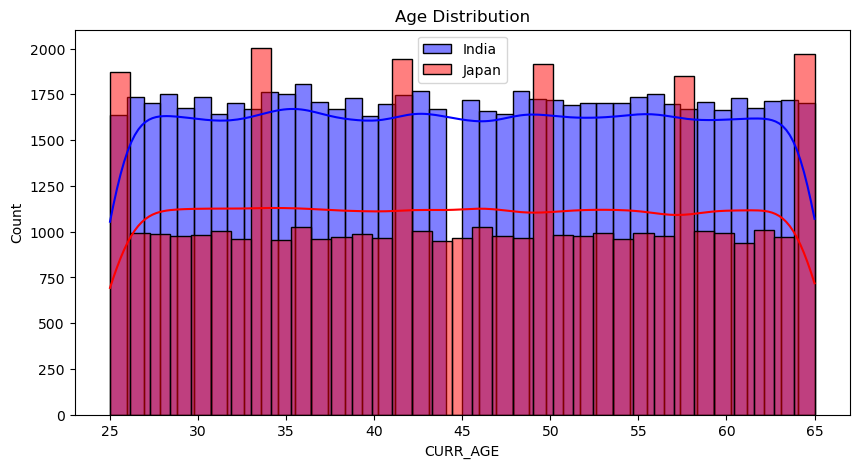

In [8]:
# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(indian_data['CURR_AGE'], kde=True, label='India', color='blue')
sns.histplot(japanese_data['CURR_AGE'], kde=True, label='Japan', color='red')
plt.title('Age Distribution')
plt.legend()
plt.show()

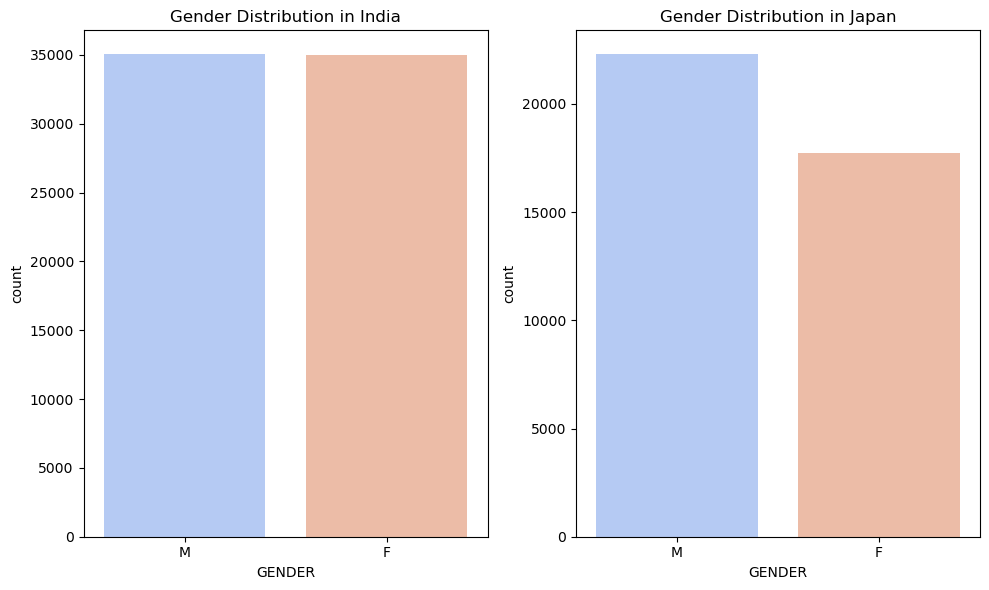

In [9]:
# Plotting the gender distribution for both datasets
plt.figure(figsize=(10, 6))

# For Indian data
plt.subplot(1, 2, 1)
sns.countplot(x='GENDER', hue='GENDER', data=indian_data, palette='coolwarm', legend=False)
plt.title('Gender Distribution in India')

# For Japanese data
plt.subplot(1, 2, 2)
sns.countplot(x='GENDER', hue='GENDER', data=japanese_data, palette='coolwarm', legend=False)
plt.title('Gender Distribution in Japan')

plt.tight_layout()
plt.show()

## Build Classification Model on Japanese Dataset

In [11]:
# Required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [12]:
# Assuming 'japanese_data' has already been loaded and preprocessed

# Feature selection using SelectKBest
X = japanese_data[['CURR_AGE', 'ANN_INCOME', 'AGE_CAR']]  # Ensure all numeric features are selected
y = japanese_data['PURCHASE']

# Select the top 2 best features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Display the selected features
print("Shape of X_new after feature selection:", X_new.shape)
print("Selected Features:\n", X_new[:5])  # Print the first 5 rows of selected features

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Display the shape of train and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display scaled features
print("Scaled Training Features:\n", X_train_scaled[:5])  # Print the first 5 rows of scaled training data
print("Scaled Test Features:\n", X_test_scaled[:5])  # Print the first 5 rows of scaled test data

Shape of X_new after feature selection: (40000, 2)
Selected Features:
 [[4.45344e+05 4.39000e+02]
 [1.07634e+05 2.83000e+02]
 [5.02787e+05 3.90000e+02]
 [5.85664e+05 4.75000e+02]
 [7.05723e+05 4.97000e+02]]
Training set shape: (32000, 2)
Test set shape: (8000, 2)
Scaled Training Features:
 [[ 1.52973868 -0.42784978]
 [-0.24392208 -0.70857191]
 [-0.3184856   2.90141625]
 [-0.50548299 -0.12250289]
 [ 0.2253229  -0.07325339]]
Scaled Test Features:
 [[-7.25064769e-01 -4.57399475e-01]
 [-8.44498971e-01 -2.89951183e-01]
 [-8.70237327e-01  3.01705499e-02]
 [ 1.07048846e+00 -5.85448168e-01]
 [ 2.31416995e+00  6.20851477e-04]]


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define a smaller parameter grid for faster search
param_grid = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [5, 10],  # Reduced number of max_depth values
    'min_samples_split': [2, 5],  # Reduced options for min_samples_split
    'min_samples_leaf': [1, 2],  # Reduced options for min_samples_leaf
}

# Perform GridSearchCV with 5-fold cross-validation and use parallel processing
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on test data
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy: 0.69050
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.83      0.69      3349
           1       0.83      0.59      0.69      4651

    accuracy                           0.69      8000
   macro avg       0.71      0.71      0.69      8000
weighted avg       0.73      0.69      0.69      8000

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


## Business Interpretation and Model Validation

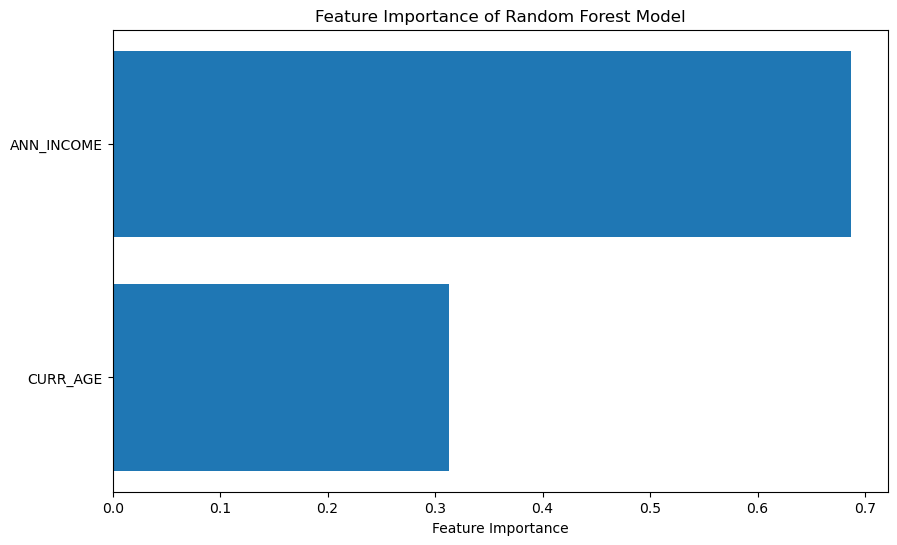

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Use the best model obtained from GridSearchCV (best_rf)
model = best_rf

# Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns  # Replace X with your features DataFrame

# Sort feature importance for plotting
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance of Random Forest Model")
plt.show()



In [ ]:
## Predict Potential Customers in Indian Market

In [33]:
print(indian_data.columns)


Index(['ID', 'CURR_AGE', 'GENDER', 'ANN_INCOME', 'DT_MAINT'], dtype='object')


In [41]:
import numpy as np

# Match the features of the Indian dataset to the features used for model training
X_india = indian_data[['CURR_AGE', 'ANN_INCOME']].copy()

# Convert the input data to NumPy array to avoid the warning
X_india_np = np.array(X_india)

# Predict using the model trained on Japanese data
india_predictions = model.predict(X_india_np)

# Count the number of potential buyers
potential_buyers = sum(india_predictions)

print(f"Number of potential buyers in the Indian market: {potential_buyers}")



Number of potential buyers in the Indian market: 70000
